In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import LinearNDInterpolator

### Task 1: Generate an NxM array

In [68]:
N = 20
M = 17


low = 3
high = 99

array = np.random.uniform(low, high, (N, M))

### Task 2: Find the nearest value

In [69]:
def find_nearest(matrix, value):
    idx = np.unravel_index((np.abs(array - value)).argmin(), matrix.shape)
    return array[idx]

find_nearest(array, 4)

3.908399786311076

### Task 3: Calculate the mean and median

In [70]:
mean_value = np.mean(array)
median_value = np.median(array)

mean_value, median_value

(50.31926372729332, 49.37600811751181)

### Task 4: Visualize the array

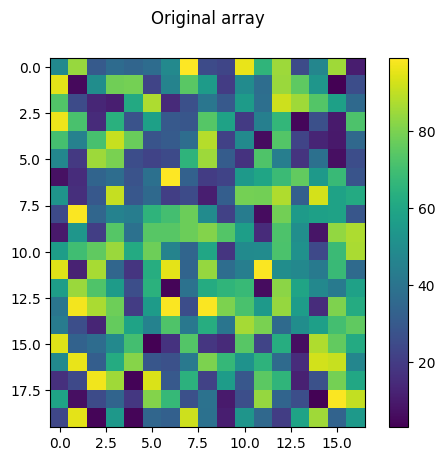

In [71]:
plt.imshow(array, cmap='viridis')
plt.suptitle('Original array')
plt.colorbar()
plt.show()

### Task 5: Nullify and restore values

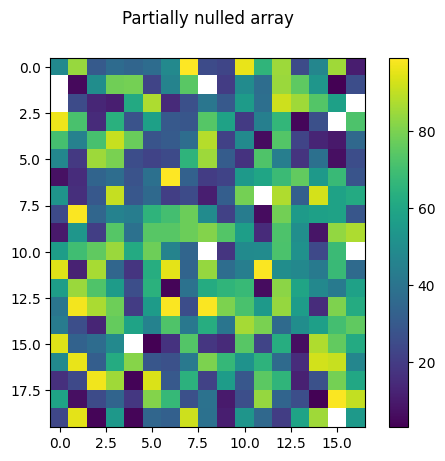

In [72]:
num_nans = 10

indices = np.random.choice(array.size, num_nans, replace=False)

np.put(array, indices, np.nan)

plt.imshow(array, cmap='viridis')
plt.suptitle('Partially nulled array')
plt.colorbar()
plt.show()

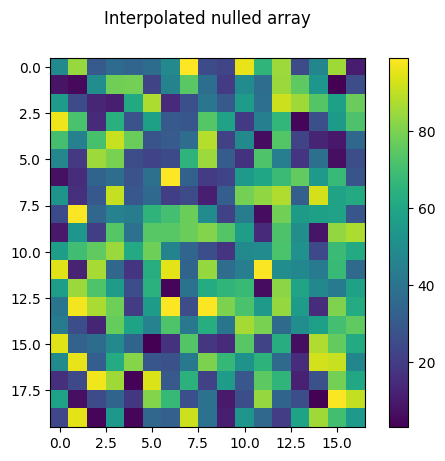

In [73]:
x = np.arange(N)
y = np.arange(M)
X, Y = np.meshgrid(x, y)

points = np.vstack([X.ravel(), Y.ravel()]).T
values = array.ravel()

valid = ~np.isnan(values)
invalid = np.isnan(values)

interp = LinearNDInterpolator(points[valid], values[valid])

values[invalid] = interp(points[invalid])

plt.imshow(array, cmap='viridis')
plt.suptitle('Interpolated nulled array')
plt.colorbar()
plt.show()

### Task 6: Normalize the array

In [74]:
normalized_array = (array / (np.max(array) - np.min(array)))
normalized_array

array([[0.50524593, 0.87876124, 0.31431144, 0.38228087, 0.35744899,
        0.38463013, 0.5037042 , 1.03159974, 0.2598339 , 0.23990142,
        0.99992204, 0.68746574, 0.88515305, 0.2614343 , 0.49191695,
        0.88741002, 0.11064196],
       [0.08403953, 0.05743709, 0.52136152, 0.81321969, 0.82300861,
        0.23674937, 0.47806327, 0.77569631, 0.39145774, 0.20780218,
        0.5159274 , 0.39089394, 0.88182619, 0.78214108, 0.55730506,
        0.03159974, 0.26982925],
       [0.57927788, 0.26123135, 0.14049936, 0.11364015, 0.63842344,
        0.90813888, 0.15212901, 0.27431212, 0.4255857 , 0.31138207,
        0.5803438 , 0.39828535, 0.95683925, 0.89054407, 0.76387405,
        0.60061769, 0.80403141],
       [1.00744512, 0.74326817, 0.15473603, 0.66663882, 0.28627266,
        0.60034039, 0.30942634, 0.29780807, 0.76983202, 0.60596512,
        0.19965134, 0.46153604, 0.69450066, 0.04840056, 0.27518488,
        0.57689199, 0.75148718],
       [0.73525448, 0.47105944, 0.74114542, 0.946901